In [2]:

def visualize(image, joint_2d):
    image = ((image + abs(image.min())) / (image + abs(image.min())).max()).copy()
    parents = np.array([-1, 0, 1, 2, 3, 0, 5, 6, 7, 0, 9, 10, 11, 0, 13, 14, 15, 0, 17, 18, 19])
    for i in range(21):
        cv2.circle(image, (int(joint_2d[i][0]), int(joint_2d[i][1])), 2, [0, 1, 0],
                    thickness=-1)
        if i != 0:
            cv2.line(image, (int(joint_2d[i][0]), int(joint_2d[i][1])),
                        (int(joint_2d[parents[i]][0]), int(joint_2d[parents[i]][1])),
                        [0, 0, 1], 1)
    return image

In [12]:
import json
from matplotlib import pyplot as plt
import cv2
import numpy as np


with open('datasets/frei_test/evaluation_xyz.json') as f:
    xyz = json.load(f)
    
with open('datasets/frei_test/evaluation_scale.json') as f:
    scale = json.load(f)
    
with open('datasets/frei_test/evaluation_K.json') as f:
    K = json.load(f)
    
joint_2d = np.dot(np.array(K[1]), np.array(xyz[1]).T).T
joint_2d = joint_2d[:, :2] / joint_2d[:, -1:]


img = cv2.imread("datasets/frei_test/evaluation/rgb/00000001.jpg")

# img = visualize(np.array(img), joint_2d)

# plt.imshow(img)

[[-0.06876980513334274, 0.0244811549782753, 0.9476402997970581], [-0.05068895220756531, -0.008157476782798767, 0.9384765625], [-0.04380372166633606, -0.03209710866212845, 0.9209902882575989], [-0.03303930163383484, -0.0490010604262352, 0.9073493480682373], [-0.03216691315174103, -0.07018374651670456, 0.8861163258552551], [0.002534806728363037, -0.006166169419884682, 0.9105151891708374], [0.026909753680229187, -0.010619081556797028, 0.8945810794830322], [0.044456034898757935, -0.013000709936022758, 0.8861567378044128], [0.06407947838306427, -0.015251712873578072, 0.874324381351471], [0.014218032360076904, 0.015312125906348228, 0.914442777633667], [0.04026263952255249, 0.019649095833301544, 0.9028897285461426], [0.05994077026844025, 0.022804629057645798, 0.8969759941101074], [0.08028902113437653, 0.027891311794519424, 0.8858218193054199], [0.010717570781707764, 0.035297691822052, 0.929511308670044], [0.03433160483837128, 0.0394187867641449, 0.9197720885276794], [0.053871408104896545, 0.0

In [20]:
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt

with open('datasets/frei_test/evaluation_xyz.json') as f:
    frei = json.load(f)
    
with open('datasets/data_230710/annotations/train/sample2.pkl', 'rb') as f:
    shaf = pickle.load(f)

frei = np.array(frei)[:, :, 2]
shaf = np.array([entry["joint_3d"] for entry in shaf])[:, :, 2]

frei_min, frei_max, frei_mean = np.min(frei), np.max(frei), np.mean(frei)
shaf_min, shaf_max, shaf_mean = np.min(shaf), np.max(shaf), np.mean(shaf)

print(frei_min, frei_max, frei_mean)
print(shaf_min, shaf_max, shaf_mean)
shaf > 0

0.33760008215904236 1.021538496017456 0.7063189262586067
-9.401763916015625 -1.5609999895095825 -5.18338991459222


True

In [4]:
def visualize_joints_2d(
    ax, joints, joint_idxs=True, links=None, alpha=1, scatter=True, linewidth=2
):
    if links is None:
        links = [
            (0, 1, 2, 3, 4),
            (0, 5, 6, 7, 8),
            (0, 9, 10, 11, 12),
            (0, 13, 14, 15, 16),
            (0, 17, 18, 19, 20),
        ]
    # Scatter hand joints on image
    x = joints[:, 0]
    y = joints[:, 1]
    if scatter:
        ax.scatter(x, y, 1, "r")

    # Add idx labels to joints
    for row_idx, row in enumerate(joints):
        if joint_idxs:
            plt.annotate(str(row_idx), (row[0], row[1]))
    _draw2djoints(ax, joints, links, alpha=alpha, linewidth=linewidth)
    ax.axis("equal")


def _draw2djoints(ax, annots, links, alpha=1, linewidth=1):
    colors = ["r", "m", "b", "c", "g"]

    for finger_idx, finger_links in enumerate(links):
        for idx in range(len(finger_links) - 1):
            _draw2dseg(
                ax,
                annots,
                finger_links[idx],
                finger_links[idx + 1],
                c=colors[finger_idx],
                alpha=alpha,
                linewidth=linewidth,
            )


def _draw2dseg(ax, annot, idx1, idx2, c="r", alpha=1, linewidth=1):
    ax.plot(
        [annot[idx1, 0], annot[idx2, 0]],
        [annot[idx1, 1], annot[idx2, 1]],
        c=c,
        alpha=alpha,
        linewidth=linewidth,
    )

In [11]:
def add_scatter_proj(ax, pred_objpoints3d, proj="z"):
    proj_1, proj_2 = get_proj_axis(proj=proj)
    if pred_objpoints3d is not None:
        ax.scatter(
            pred_objpoints3d[:, proj_1],
            pred_objpoints3d[:, proj_2],
            c="r",
            alpha=0.1,
            s=1,
        )
    # ax.set_aspect("equal")
    
def get_proj_axis(proj="z"):
    if proj == "z":
        proj_1 = 0
        proj_2 = 1
    elif proj == "y":
        proj_1 = 0
        proj_2 = 2
    elif proj == "x":
        proj_1 = 1
        proj_2 = 2
    return proj_1, proj_2

In [2]:
def visualize(image, joint_2d):
    image = ((image + abs(image.min())) / (image + abs(image.min())).max()).copy()
    parents = np.array([-1, 0, 1, 2, 3, 0, 5, 6, 7, 0, 9, 10, 11, 0, 13, 14, 15, 0, 17, 18, 19])
    for i in range(21):
        cv2.circle(image, (int(joint_2d[i][0]), int(joint_2d[i][1])), 2, [0, 1, 0],
                    thickness=-1)
        if i != 0:
            cv2.line(image, (int(joint_2d[i][0]), int(joint_2d[i][1])),
                        (int(joint_2d[parents[i]][0]), int(joint_2d[parents[i]][1])),
                        [0, 0, 1], 1)
            
    return image

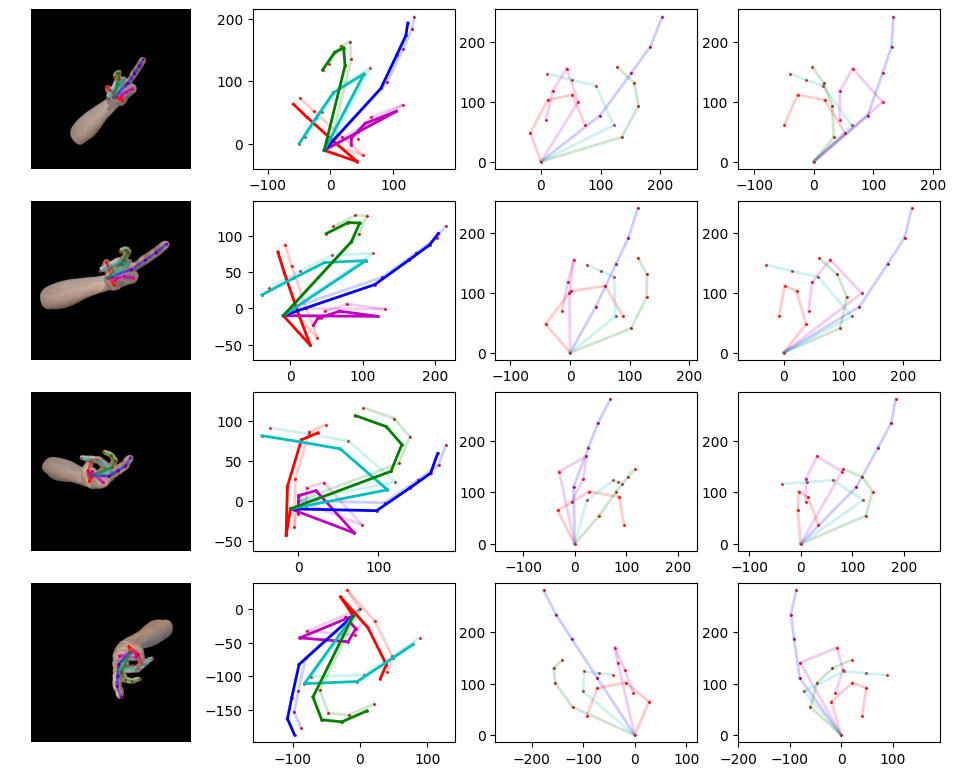

In [27]:
import pickle
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

with open("datasets/data_230710/annotations/train/example.pkl", "rb") as f:
    meta = pickle.load(f)

num = 5
fig = plt.figure(figsize = (12, 12))
for idx in range(1, num):
    img_name = '/'.join(meta[idx]['file_name'].split('/')[1:])
    img = cv2.imread(os.path.join("datasets/data_230710/images/train", img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    joint_2d = np.array(meta[idx]["joint_2d"])

    joint_3d = np.array(meta[idx]["camera_coor_3d"])
    joint_3d = (joint_3d - joint_3d[0]) * 100
    joint_3d[:, 0] = - joint_3d[:, 0]

    ax = fig.add_subplot(num, 4, (num - 1) * (idx - 1) + 1)
    ax.imshow(img)
    visualize_joints_2d(ax, joint_2d, joint_idxs=False, alpha=0.5)
    ax.axis("off")

    ax = fig.add_subplot(num, 4, (num - 1) * (idx - 1) + 2)
    visualize_joints_2d(ax, np.stack([joint_3d[:, 0], joint_3d[:, 1]], axis = 1), alpha=0.2,
                joint_idxs=False,)
    visualize_joints_2d(ax, np.stack([joint_3d[:, 0]-10, joint_3d[:, 1]-10], axis = 1), 
                joint_idxs=False, )


    ax = fig.add_subplot(num, 4, (num - 1) * (idx - 1) + 3)
    visualize_joints_2d(ax, np.stack([joint_3d[:, 1], joint_3d[:, 2]], axis = 1), alpha=0.2,
                joint_idxs=False,)


    ax = fig.add_subplot(num, 4, (num - 1) * (idx - 1) + 4)
    visualize_joints_2d(ax, np.stack([joint_3d[:, 0], joint_3d[:, 2]], axis = 1), alpha=0.2,
                joint_idxs=False,)

plt.show()